In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Chapter8: Tree-Based Methods

* Tree-based methods are simple and useful for interpretation.
* But this methods aer not competitive with the best supervised learning approaches.
* In this chapter, we introduce decision tree, bagging, random forest, boosting and Bayesain additive regression tree (BART)
* Decision tree can both use for regression and classification problems.

# Regression Tree

Roughly speaking, there are two steps.
1. We divide the predictor space ($X_1, X_2,...,X_p$) into $J$ distinct and non-overlapping regions, $R_1,R_2,...,R_J$
2. For every observation that fall into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

On step 1, How do we construct the regions $R_1,R_2,...,R_J$? The goal is to find boxes $R_1,R_2,...,R_j$ that minimize the RSS (residual sum square), given by $$ \sum_{j=1}^J\sum_{i \in R_j} (y_i-\hat{y}_{R_j})^2$$ where $\hat{y}_{R_j}$ is the mean response for the training observations within the $i$th box. We use top-down, greedy approach that is known as **recursive binary splitting** since it is computationally infeasible to consider every partition of the features space into $J$ boxes. The approach is top-down because it begins at the top of the tree and then splits the predictor space with two braches further down in the tree. In addition, it is greedy because at each step, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.

In order to perform recursive binary splitting, we first select the predictor $X_j$ and the cut point $s$ such that splitting the predictor space into the regions {$X|X_j<s$} and {$X|X_j≥s$} leads to the greatest possible reduction in RSS. For any j and s, we define the pair of half-planes $$ R_1(j,s) = \{X|X_j<s \} \text{ and } R_2(j,s)=\{X|X_j≥s\} $$ and we seek the value $j$ and $s$ that minimize the equation $$ \sum_{i:x_i\in R_1(j,s)}(y_i-\hat{y}_{R_1})^2 +  \sum_{i:x_i\in R_2(j,s)}(y_i-\hat{y}_{R_2})^2 $$ we then repeat the process until a stopping criterion is reached; for instance, we may continue until no region contain more than five observations.

# Tree Pruning
This process will reduce complexity of the tree by making a tree smaller. A smaller tree with fewer splits might lead to lower variance and better interpretation at the cost of little bias. We will try to minimize $$ \sum_{m=1}^{|T|}\sum_{i:x_i \in R_m} (y_i-\hat{y}_{R_m})^2  + \alpha|T|$$ $|T|$ indicates the number of terminal nodes of the tree T. The tuning parameter $\alpha$ controls a trade-off between the subtree's complexity and its fit to the training data. When $\alpha=0$, then the subtree will simply equal $T_0$ we can select the value of alpha using cross-validation.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ISLR_data/Hitters.csv')
df = df.dropna()
df = df.replace(['N', 'A', 'W', 'E'], [1,0,1,0])
df['Salary'] = np.log(df['Salary'])

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,6.163315,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,6.173786,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,6.214608,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,4.516339,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,6.620073,0


In [5]:
df_1 = df[['Hits', 'Years', 'Salary']]

[Text(0.5, 0.8333333333333334, 'Years <= 4.5\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.25, 0.5, 'Hits <= 15.5\nsquared_error = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.176\nsamples = 2\nvalue = 7.243'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.371\nsamples = 88\nvalue = 5.058'),
 Text(0.75, 0.5, 'Hits <= 117.5\nsquared_error = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.252\nsamples = 83\nvalue = 6.74')]

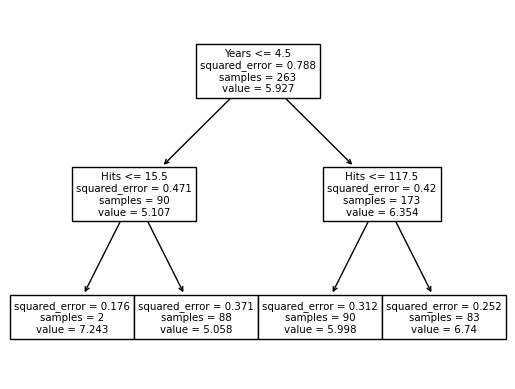

In [6]:
DTree = DecisionTreeRegressor(max_depth=2)
DTree.fit(df_1[['Hits', 'Years']], df_1['Salary'])
tree.plot_tree(DTree, feature_names = ['Hits', 'Years'])

# Classification Tree

Unlike regression, classification tree predict that each observation belongs to the most commonly occuring class of training observations in the region to which it belongs. The task of growing treeis quite similar to the task of regression tree. Just as in the regression setting, we use **recursive binary splitting** to grow a classification tree. However, in the classification setting, RSS cannot be used as a criterion. An alternative criterion is the **classification error rate**, given by $$ E = 1 - \displaystyle \max_k(\hat{p}_{mk}) $$ where $p_{mk}$ represents the proportion of training observations in the $m$th region that are from the $k$th class. However, it turns out that classification error is not sufficiently sensitive for tree-growing, and in practice two other measures are preferable.


The **Gini index** is defined by $$ G = \sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk}) $$ Gini index is referred to as a measure of node purity since $G$ will be close to zero if $\hat{p}_{mk}$ or $1-\hat{p}_{mk}$ are close to zero. A small value indicate that a node contains predominantly observations from a ssingle class.

An alternative to Gini index is **entropy**, given by $$ D = -\sum_{k=1}^K \hat{p}_{mk}log\hat{p}_{mk}$$ The entropy will take small value if the $m$th node is pure.


# Advantages and Disadvantages of Trees

**Advantages**
* Trees are very easy to explain to people.
* Trees can be displayed graphically.
* Trees can easily handle quanlitative predictors without need to create dummy variables.

**Disadvantages**
* Trees do not have the same level of acuuracy when compare to other methods.
* Trees can be very non-robust. In othe word, a small change in data can cause a large change in the final estimated tree.


# Bagging

Decision tree suffer from high variance. This means that if we split training data into two parts at random and fit a decision tee on both halves. The results that we got would be quite different. 

Boostrap Aggregation, or bagging, is a procedure for reducing the variance of a statistical learning methods. It is particularly useful and frequently use in the context of decision tree.

Recall that given a set of n independent observations $Z_1,Z_2,...,Z_n$ each with variance $\sigma^2$. The variance of the mean $\bar{Z}$ is $$ \bar{Z} = \frac{Z_1+...+Z_n}{n}= \frac{\mathbb{1}^TZ}{n} $$ Then, $$ cov(\bar{Z}) = \frac{\mathbb{1}^Tcov(Z)\mathbb{1}}{n^2}, cov(Z)=\sigma^2I $$ Hence, $$ cov(\bar{Z})=\frac{n\sigma^2}{n^2}=\frac{\sigma^2}{n} $$ In other word, averaging a set of observations reduce variance. Hence a natural way to reduce the variance and increase the test accuray of a statistical method is to take many training set from the population, build a seperate prediction using each training set, and average the resulting predictions. We could calculate $\hat{f}^1(x), \hat{f}^2(x),...,\hat{f}^B(x) $ using $B$ seperate training sets, and average them in order to obtain a single low-variance statistical model, given by $$ \hat{f}_{avg}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x) $$ This is not practical because we generally do not have access to multiple training sets. Instead, we can boostrap, by taking repeated samples from the (single) training data set. In this approach we generate $B$ different boostrapped training data sets. We then train our method on the $b$th boostrapped training set in order to get $\hat{f}^{*b}(x)$, and finally average all the predictions, to obtain $$ \hat{f}_{bag}(x)=\frac{1}{B}\sum_{b=1}^B\hat{f}^{*b}(x) $$ This is call **bagging**.

# Random Forest (RF)

Suppose that there is one strong predictor in the dataset. Then in the collection of bagged trees, most or all of trees will use this strong predictor in the top split. Consequently, all of bagged trees will look similar to each other. Hence, the prediction from the bagged trees will be highly correlated. Averaging many high correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities.

Random foresr overcomes this problem by forcing each split to consider only a subset of predictors. We can think of this process as **decorrelating** the trees. The main difference between bagging and random forests is the choice of predictor subset size m.

# Boosting

Unlike Bagging, Boosting does not involve boostrap sampling; instead each tree is fit on a modify version of the original dataset. The tree is grown using information from previously grown trees. In this approach, we fit a decision tree to the residuals from the model. The algorithm shows below.

1. Set $\hat{f}(x)=0 \text{ and } r_i = y_i$ for all $i$ in the training set.
2. For b = 1,2,...,B repeat:

  a.) Fit a tree $\hat{f^b}$ with d split (d+1 terminal nodes) to the training data $(X,r)$

  b.) Update $\hat{f}$ by adding in a shrunken version of the new tree: $$ \hat{f} = \hat{f} + \lambda\hat{f^b}(x) $$

  c.) Update the residuals, $$ r_i = r_i - \lambda\hat{f^b}(x_i) $$

3. output the boosted model, $$ \hat{f}(x) = \sum_{b=1}^B\lambda\hat{f^b}(x) $$


* The number of trees B, unlike Bagging and random forest, boosting can overfit if B is too large, although this overfitting tends to occur slowly at all. We use cross validation to select B.

* The shrinkage parameter $\lambda$, a small positive number. This controls the rate at which boosting learns. Typical values are 0.01 or 0.001, and the right choice can depend on the problem.

* The number d of splits in each tree, which controls the complexity of the boosted ensemble. Often d = 1 works well, in which case each tree is stump, consisting of a singke split.



#Lab

### Classification tree (using cross validation to choose pruning parameter)

In [7]:
# import data
df = pd.read_csv('/content/drive/MyDrive/ISLR_data/Carseats.csv')

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
# Create variable name High (if Sales exceeds 8) to be response  
df['High'] = np.where(df['Sales']>8, 'Yes', 'No')
# Encode categorical variable
df = df.replace(['Yes','No', 'Bad','Good','Medium'],[1,0,0,2,1])

In [10]:
# Fit tree without pruning
dtree1 = DecisionTreeClassifier()
dtree1.fit(df.drop(['Sales','High'],axis=1), df['High'])

DecisionTreeClassifier()

In [11]:
print('Variabel used in the tree:', dtree1.feature_names_in_)
print('The number of terminal node:', dtree1.get_n_leaves())
print('Accuracy score:', dtree1.score(df.drop(['Sales','High'],axis=1), df['High']))

Variabel used in the tree: ['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'ShelveLoc' 'Age'
 'Education' 'Urban' 'US']
The number of terminal node: 61
Accuracy score: 1.0


Find importance of the features

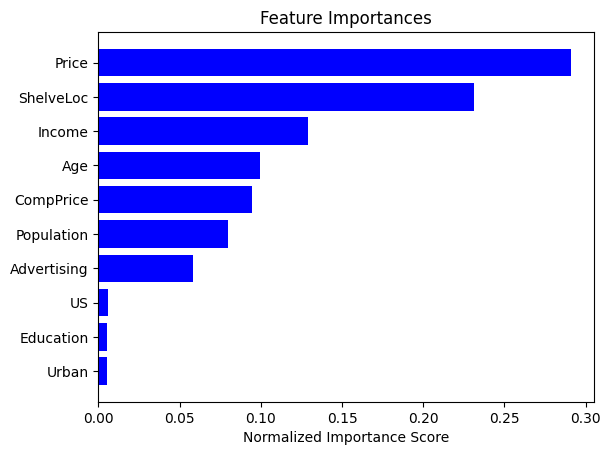

In [12]:
features = df.drop(['Sales','High'],axis=1).columns
importances = dtree1.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Normalized Importance Score')
plt.show()

Display tree

In [13]:
from sklearn import tree

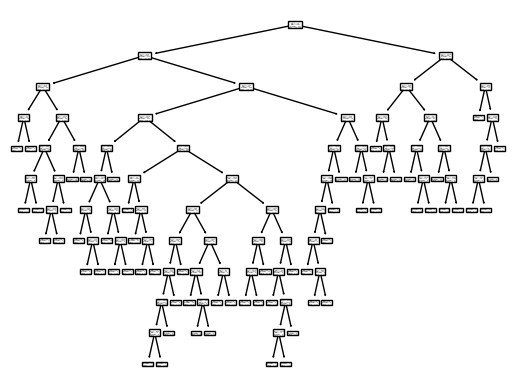

In [14]:
tree.plot_tree(dtree1)
plt.show()

Train Test Spit on the data set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Sales','High'],axis=1), df['High'],
                                                    test_size=0.33, random_state=42)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train, y_train)
y_pred = dtree2.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[51, 19],
       [23, 39]])

In [19]:
accuracy_score(y_test, y_pred)

0.6818181818181818

Cross validation to choose pruning parameter

In [20]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [72]:
n_splits=5
kf = KFold(n_splits=n_splits,shuffle=True, random_state=42)
alpha = np.logspace(-4,-1.5,20)
accs_test = []
accs_train = []
x = df.drop(['High','Sales'],axis=1).to_numpy()
y = df['High'].to_numpy()
for i in range(len(alpha)):
  acc_test = 0
  acc_train = 0
  for train, test in kf.split(x):
    X_train = x[train,:]
    y_train = y[train]
    X_test = x[test,:]
    y_test = y[test]
    dtree = DecisionTreeClassifier(ccp_alpha=alpha[i])
    dtree.fit(X_train,y_train)
    acc_test += dtree.score(X_test,y_test)
    acc_train += dtree.score(X_train,y_train)
  accs_test.append(acc_test/n_splits)
  accs_train.append(acc_train/n_splits)

Text(0, 0.5, 'Accuracy Score')

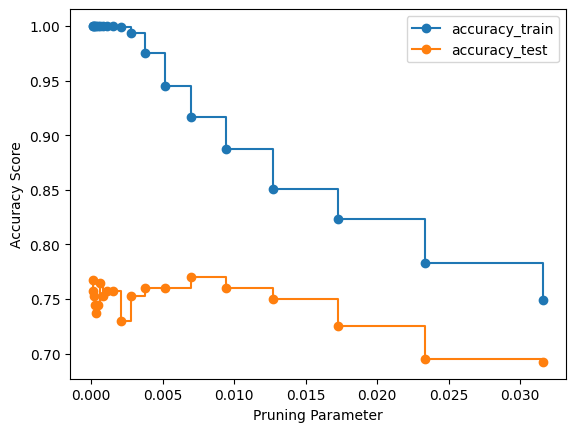

In [73]:
plt.plot(alpha, accs_train, marker="o", drawstyle="steps-post", label='accuracy_train')
plt.plot(alpha, accs_test,  marker="o", drawstyle="steps-post",label='accuracy_test')
plt.legend()
plt.xlabel('Pruning Parameter')
plt.ylabel('Accuracy Score')

In [86]:
alpha_best = alpha[np.argmax(accs_test)]
dtree_best = DecisionTreeClassifier(ccp_alpha=alpha_best)
dtree_best.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0069519279617756054)

In [96]:
print('The number of terminal node:',dtree_best.get_n_leaves())

The number of terminal node: 17


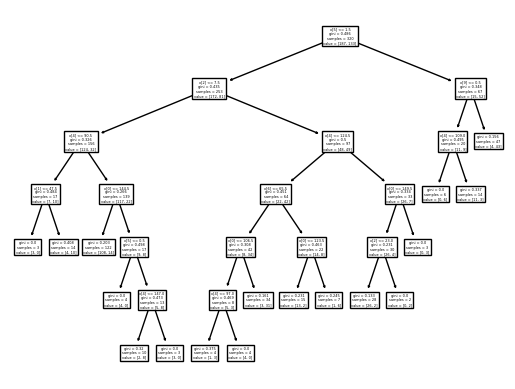

In [94]:
tree.plot_tree(dtree_best)
plt.show()

### Regression Tree

In [159]:
df2 = pd.read_csv('/content/drive/MyDrive/ISLR_data/Boston.csv')

In [160]:
df2.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [161]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [162]:
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [172]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('medv',axis=1), df2['medv']
                                                    ,test_size=0.33, random_state=42)

In [164]:
dt_re1 = DecisionTreeRegressor().fit(X_train,y_train)

In [165]:
print('Mean Squared Error:',mean_squared_error(dt_re1.predict(X_test),y_test))

Mean Squared Error: 18.841377245508983


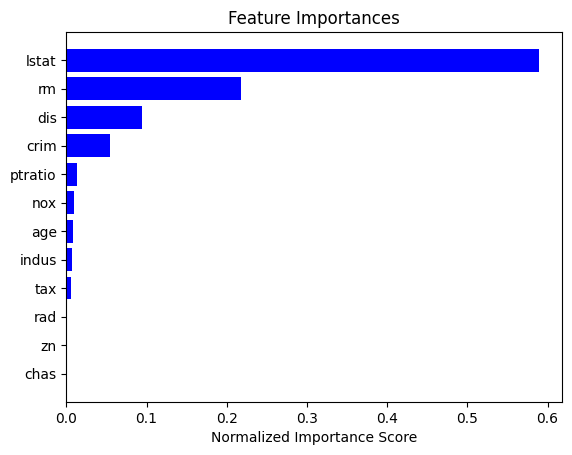

In [166]:
features = X_train.columns
importances = dt_re1.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Normalized Importance Score')
plt.show()

In [167]:
n_splits=5
kf = KFold(n_splits=n_splits,shuffle=True, random_state=42)
alpha = np.logspace(-3,-1.5,30)
mses_test = []
mses_train = []
x = df2.drop('medv',axis=1).to_numpy()
y = df2['medv'].to_numpy()
for i in range(len(alpha)):
  mse_test = 0
  mse_train = 0
  for train, test in kf.split(x):
    X_train = x[train,:]
    y_train = y[train]
    X_test = x[test,:]
    y_test = y[test]
    dtree = DecisionTreeRegressor(ccp_alpha=alpha[i])
    dtree.fit(X_train,y_train)
    mse_test += mean_squared_error(dtree.predict(X_test),y_test)
    mse_train += mean_squared_error(dtree.predict(X_train),y_train)
  mses_test.append(mse_test/n_splits)
  mses_train.append(mse_train/n_splits)

Text(0, 0.5, 'Mean Squared Error')

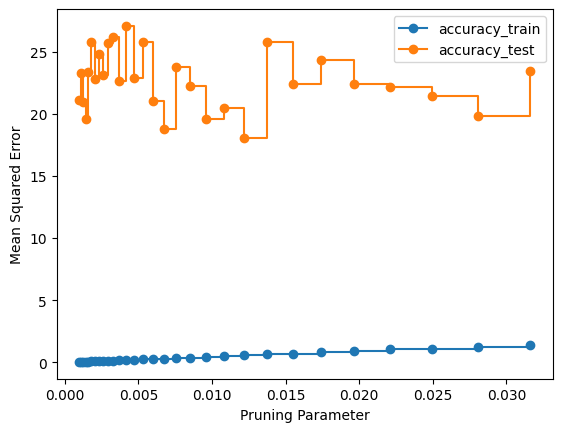

In [168]:
plt.plot(alpha, mses_train, marker="o", drawstyle="steps-post", label='accuracy_train')
plt.plot(alpha, mses_test,  marker="o", drawstyle="steps-post",label='accuracy_test')
plt.legend()
plt.xlabel('Pruning Parameter')
plt.ylabel('Mean Squared Error')

### Bagging and Random Forest

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
regr1 = RandomForestRegressor(n_estimators = 100, random_state=0)
regr1.fit(X_train, y_train)
print('Mean Squared Error 1:', mean_squared_error(regr1.predict(X_test), y_test))

regr2 = RandomForestRegressor(n_estimators = 100, max_features='sqrt', random_state=0)
regr2.fit(X_train, y_train)
print('Mean Squared Error 2:', mean_squared_error(regr2.predict(X_test), y_test))

regr3 = RandomForestRegressor(n_estimators = 100, max_features=int(len(X_train.columns)/2), random_state=0)
regr3.fit(X_train, y_train)
print('Mean Squared Error 2:', mean_squared_error(regr3.predict(X_test), y_test))

Mean Squared Error 1: 11.117930796407187
Mean Squared Error 2: 9.95280401197604
Mean Squared Error 2: 9.565396125748505


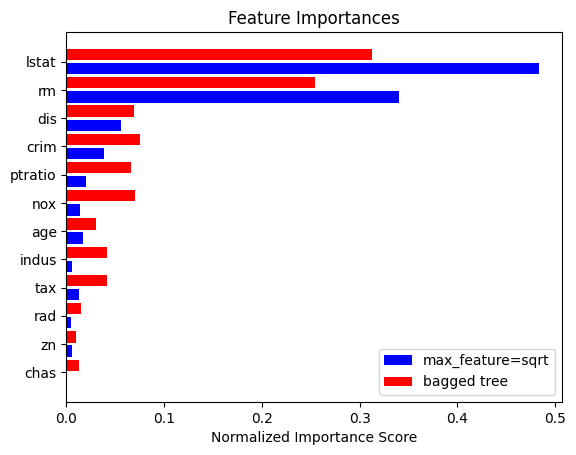

In [199]:
features = X_train.columns
importances1 = regr1.feature_importances_
importances2 = regr2.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
width = 1 
plt.barh(np.arange(0,2*len(indices),2), importances1[indices], color='b', align='center',label='max_feature=sqrt')
plt.barh(np.arange(0,2*len(indices),2)+width, importances2[indices], color='r', align='center',label='bagged tree')
plt.yticks(np.arange(0,2*len(indices),2)+width/2, [features[i] for i in indices])
plt.xlabel('Normalized Importance Score')
plt.legend()
plt.show()

In [211]:
n_tree = [1, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400 ,450, 500]
err_all = []
err_half = []
err_sqrt = []
for i in range(len(n_tree)):
  regr1 = RandomForestRegressor(n_estimators = n_tree[i], random_state=0).fit(X_train, y_train)
  regr2 = RandomForestRegressor(n_estimators = n_tree[i], max_features=int(len(X_train.columns)/2),  random_state=0).fit(X_train, y_train)
  regr3 = RandomForestRegressor(n_estimators = n_tree[i], max_features='sqrt', random_state=0).fit(X_train, y_train)
  err_all.append(mean_squared_error(regr1.predict(X_test), y_test))
  err_half.append(mean_squared_error(regr2.predict(X_test), y_test))
  err_sqrt.append(mean_squared_error(regr3.predict(X_test), y_test))

Text(0, 0.5, 'Mean Squared Error')

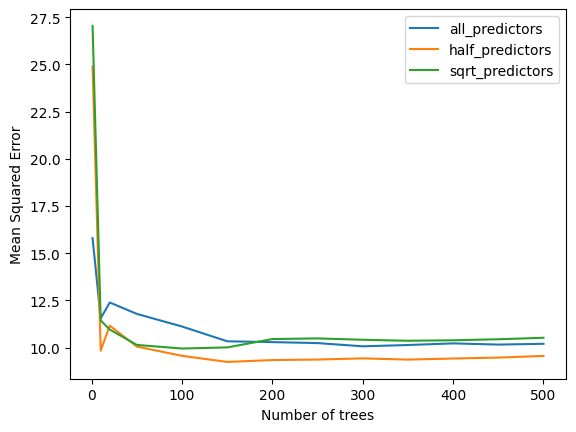

In [214]:
plt.plot(n_tree, err_all, label = 'all_predictors')
plt.plot(n_tree, err_half, label='half_predictors')
plt.plot(n_tree, err_sqrt, label='sqrt_predictors')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Mean Squared Error')

In [220]:
print('Minimum MSE of using all predictors:', np.min(err_all))
print('Minimum MSE of using half predictors:', np.min(err_half))
print('Minimum MSE of using square of predictors:', np.min(err_sqrt))

Minimum MSE of using all predictors: 10.069218209580844
Minimum MSE of using half predictors: 9.242529210911504
Minimum MSE of using square of predictors: 9.95280401197604


### Boosting

In [216]:
from sklearn.ensemble import GradientBoostingRegressor

In [217]:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, random_state=0).fit(X_train,y_train)

In [218]:
print('Mean Squared Error:', mean_squared_error(y_test, reg.predict(X_test)))

Mean Squared Error: 9.468259653932838


In [222]:
lr = np.logspace(-4,-1,20)
mse_train = []
mse_test = []
for i in range(len(lr)):
  reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4,learning_rate=lr[i], random_state=0)
  reg.fit(X_train,y_train)
  mse_train.append(mean_squared_error(y_train,reg.predict(X_train)))
  mse_test.append(mean_squared_error(y_test,reg.predict(X_test)))

Text(0, 0.5, 'Mean Squared Error')

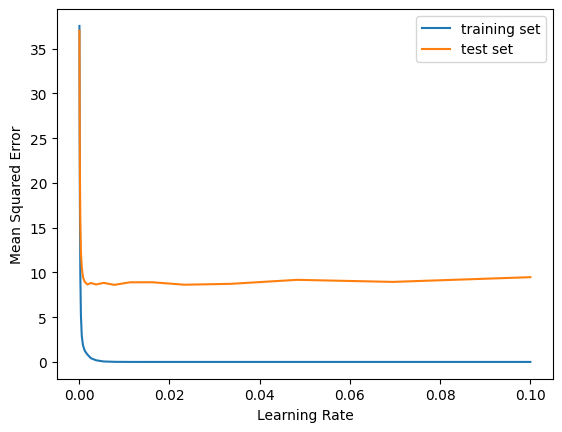

In [223]:
plt.plot(lr, mse_train, label = 'training set')
plt.plot(lr, mse_test, label = 'test set')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')

In [224]:
print('Minimum test accuracy:', np.min(mse_test))

Minimum test accuracy: 8.611487586341537
